Develop an autoencoder to encode and decode the image. Analyze the results.
* a) Develop AE for MNIST dataset
* b) Use output of AE as input to CNN


In [ ]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
(X_train, _), (X_test, _) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train.shape[1:]

(28, 28)

In [ ]:
#data should always be of the format “(Number of data points, data point dimension)”. In this case, the training data will be of format 60,000×784.
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
input_img= Input(shape=(784,))

In [ ]:
encoded = Dense(units=32, activation='relu')(input_img)

In [ ]:
decoded = Dense(units=784, activation='sigmoid')(encoded)

In [ ]:
autoencoder=Model(input_img, decoded)

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
encoder = Model(input_img, encoded)

In [ ]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
autoencoder.fit(X_train, X_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/20
235/235 [==============================] - 4s 15ms/step - loss: 0.2749 - accuracy: 0.0088 - val_loss: 0.1898 - val_accuracy: 0.0115
Epoch 2/20
235/235 [==============================] - 5s 20ms/step - loss: 0.1716 - accuracy: 0.0104 - val_loss: 0.1546 - val_accuracy: 0.0112
Epoch 3/20
235/235 [==============================] - 6s 26ms/step - loss: 0.1450 - accuracy: 0.0107 - val_loss: 0.1339 - val_accuracy: 0.0097
Epoch 4/20
235/235 [==============================] - 6s 26ms/step - loss: 0.1287 - accuracy: 0.0105 - val_loss: 0.1212 - val_accuracy: 0.0108
Epoch 5/20
235/235 [==============================] - 6s 27ms/step - loss: 0.1185 - accuracy: 0.0103 - val_loss: 0.1130 - val_accuracy: 0.0097
Epoch 6/20
235/235 [==============================] - 4s 16ms/step - loss: 0.1114 - accuracy: 0.0104 - val_loss: 0.1071 - val_accuracy: 0.0112
Epoch 7/20
235/235 [==============================] - 3s 13ms/step - loss: 0.1063 - accuracy: 0.0107 - val_loss: 0.1029 - val_accuracy: 0.0115

In [ ]:
encoded_imgs = encoder.predict(X_test)


313/313 [==============================] - 0s 1ms/step


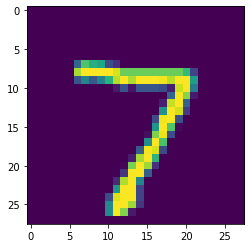

In [ ]:
plt.imshow(X_test[0].reshape(28,28))

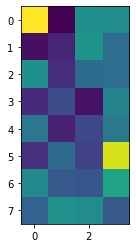

In [ ]:
plt.imshow(encoded_imgs[0].reshape(8,4))

In [ ]:
predicted = autoencoder.predict(X_test)

313/313 [==============================] - 1s 1ms/step


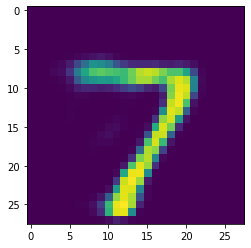

In [ ]:
plt.imshow(predicted[0].reshape(28,28))

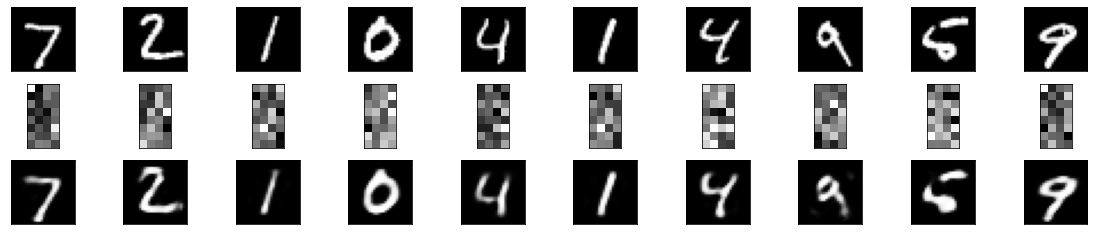

In [ ]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
    
plt.show()
